[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pJNvpjRT672w6Wp5sZJnC56oMhqmch2k?usp=sharing)

# Neural Networks & Convolution Neural Networks Essential Training

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pylab as plt


In [ ]:
# Define a transform to normalize the data
transform = transforms.ToTensor()

# Download and load the training data
train_images = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_images = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=True)

## Analyzing the Dataset

**Confirm type and dimensions of the dataset**

In [ ]:
train_images.data.shape

In [ ]:
test_images.data.shape

**How many instances do we have of each of the different classes?**

In [ ]:
np.unique(train_images.targets, return_counts=True)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Get 16 images at random
import random
random.seed(1)
train_idx = list(range(len(train_images)))
sampler = random.sample(train_idx, 16)
sampler

In [ ]:
plt.figure(figsize=(10, 10))
for i, idx in enumerate(sampler):
    image, label = train_images[idx]
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image.squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()


**What does one image look like?**

In [ ]:
random_image_id = 1
image, label = train_images[random_image_id]
plt.figure()
plt.imshow(image.squeeze(), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
class_names[label]

In [ ]:
train_images[random_image_id][0].shape

In [ ]:
train_images[random_image_id]

## Defining the Neural Network

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
).to(device)

In [ ]:
import torch.nn.functional as F

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the layers of the network
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(28 * 28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        # Define the forward pass
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # No activation on the final layer for raw logits
        return x

# Create an instance of the model and move it to the desired device
model = NeuralNetwork().to(device)

## Challenge

See course video

## Solution

See course video

## Loss

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()

## Optimizer

In [ ]:
optimizer = torch.optim.Adam(model.parameters())

## Before we train a Neural Network

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pylab as plt
import torch.nn.functional as F

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the layers of the network
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(28 * 28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        # Define the forward pass
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork().to(device)

In [ ]:
# Define a transform to normalize the data
transform = transforms.ToTensor()

# Download and load the training data
train_images = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_images = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

epochs = 30

In [ ]:
image_id = 12 # Pick an image id between 0 and 9999 inclusive

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)



# Get a single image and its corresponding label
img = images[image_id].to(device)
true_label = labels[image_id].to(device)

# Make a prediction
with torch.no_grad():
    logits = model(img.unsqueeze(0)) # We extract a single test image. Get raw prediction scores (logits)

ps = torch.nn.functional.softmax(logits, dim=1).cpu() #convert those to probabilities using the exponential function, and identify the predicted class.
predictions = ps.numpy()[0]
predicted_label = np.argmax(predictions)

def plot_image(predictions_array, true_label, img):
  '''The visualization functions help interpret model behavior by showing not just what it predicted, but how confident it was about each possible class.'''
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.cpu().numpy().squeeze(), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions, true_label.item(), img)
plt.subplot(1,2,2)
plot_value_array(predictions,  true_label.item())
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

## Training the Neural Network

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pylab as plt
import torch.nn.functional as F

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the layers of the network
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(28 * 28, 128)
        self.fc2 = torch.nn.Linear(128, 64)
        self.fc3 = torch.nn.Linear(64, 10)

    def forward(self, x):
        # Define the forward pass
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # No activation on the final layer for raw logits
        return x

# Create an instance of the model and move it to the desired device
model = NeuralNetwork().to(device)

In [ ]:
# Define a transform to normalize the data
transform = transforms.ToTensor()

# Download and load the training data
train_images = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_images = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

epochs = 30

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
model.train()

epochs = epochs
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images) # 1. Forward Pass
        loss = loss_function(output, labels) #2.  Calculate Loss
        loss.backward() # 3. Backward Pass
        optimizer.step() # 4. Optimizer Step

        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

In [ ]:
image_id = 13 # Pick an image id between 0 and 9999 inclusive

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)



# Get a single image and its corresponding label
img = images[image_id].to(device)
true_label = labels[image_id].to(device)

# Make a prediction
with torch.no_grad(): #This tells PyTorch we are only doing inference (predicting), not training, so it doesn't need to keep track of gradients.
                      #This makes the process faster and uses less memory.
    logits = model(img.unsqueeze(0)) # We extract a single test image, pass it through the model to get raw prediction scores (logits)

ps = torch.nn.functional.softmax(logits, dim=1).cpu() #convert those to probabilities using the exponential function, and identify the predicted class.
predictions = ps.numpy()[0]
predicted_label = np.argmax(predictions) #Finally, np.argmax() finds the index of the class with the highest probability, which becomes our model's final prediction.

#The visualization functions help interpret model behavior by showing not just what it predicted, but how confident it was about each possible class.
def plot_image(predictions_array, true_label, img):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.cpu().numpy().squeeze(), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions, true_label.item(), img)
plt.subplot(1,2,2)
plot_value_array(predictions,  true_label.item())
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

## Testing the Neural Network Model


In [ ]:
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)
loss_function = torch.nn.CrossEntropyLoss()

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model, loss_function)

## Convolution Neural Networks

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pylab as plt

In [ ]:
import torch.nn.functional as F

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # Input (1, 28, 28)
        # First convolutional layer: takes 1 input channel (grayscale), produces 6 output feature maps using 5x5 filters.
        # padding=2 adds 2 pixels of zeros around the image edges, keeping output size at 28x28.
        self.conv1 = torch.nn.Conv2d(1, 6, 5, padding=2) # Output: (6, 28, 28)
        # Max pooling layer with 2x2 window and stride of 2.
        self.pool = torch.nn.MaxPool2d(2, 2) # Output: (6, 14, 14)
        # Feature maps (lenet has 16 here)
        # Size of the kernel 5x5
        # No padding spatial size reduces from 14x14 to 10x10.
        self.conv2 = torch.nn.Conv2d(6, 16, 5) # Output: (16, 10, 10)
        # After a second pooling, the size will be (16, 5, 5)
        self.fc1 = torch.nn.Linear(16 * 5 * 5, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # Flatten the 3D output (16x5x5) into a 1D vector to feed into the fully connected layers.
        #The -1 tells PyTorch to automatically calculate the batch size.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = LeNet().to(device)

In [ ]:
# Define a transform to normalize the data
transform = transforms.ToTensor()

# Download and load the training data
train_images = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_images = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

epochs = 30

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
model.train()

epochs = epochs

for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images) # 1. Forward Pass
        loss = loss_function(output, labels) # 2. Calculate Loss
        loss.backward() # 3. Backward Pass
        optimizer.step() # 4. Optimizer Step
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model, loss_function)

## CIFAR-10 Classification

### CIFAR-10 Dataset

In [ ]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Randomly flip images
    transforms.RandomCrop(32, padding=4),  # Random crop with padding
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                         std=[0.2471, 0.2435, 0.2616])
])

## 💾 Download and load the training and testing data
train_images = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_images = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

## 📦 Create data loaders
train_loader = torch.utils.data.DataLoader(train_images, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_images, batch_size=64, shuffle=False)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

epochs = 30

100%|██████████| 170M/170M [00:06<00:00, 26.6MB/s]


### Neural Network

In [ ]:
import torch
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pylab as plt
import torch.nn.functional as F

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(32 * 32 * 3, 256)
        self.fc2 = torch.nn.Linear(256, 128)
        self.fc3 = torch.nn.Linear(128, 10)
        self.dropout = torch.nn.Dropout(0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork().to(device)

In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
model.train()

epochs = epochs
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)  # 1. Forward Pass
        loss = loss_function(output, labels) # 2. Calculate Loss
        loss.backward()  # 3. Backward Pass
        optimizer.step()  # 4. Optimizer Step
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model, loss_function)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

image_id = 13 # Pick an image id between 0 and 9999 inclusive

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# If you don't de-normalize, the colors might look wrong.
img = images[image_id].to(device)
true_label = labels[image_id].to(device)

# Make a prediction
with torch.no_grad(): # Inference mode
    logits = model(img.unsqueeze(0))

ps = torch.nn.functional.softmax(logits, dim=1).cpu()
predictions = ps.numpy()[0]
predicted_label = np.argmax(predictions)

def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img_display = np.clip(img.cpu().numpy().transpose((1, 2, 0)), 0, 1)

    plt.imshow(img_display)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(predictions, true_label.item(), img)
plt.subplot(1,2,2)
plot_value_array(predictions, true_label.item())
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

### Convolution Neural Network

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

class CNN(torch.nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # First convolutional block
        self.conv1 = torch.nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = torch.nn.BatchNorm2d(32)
        self.conv2 = torch.nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.bn2 = torch.nn.BatchNorm2d(32)
        self.pool1 = torch.nn.MaxPool2d(2, 2)  # 32x32 -> 16x16

        # Second convolutional block
        self.conv3 = torch.nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn3 = torch.nn.BatchNorm2d(64)
        self.conv4 = torch.nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn4 = torch.nn.BatchNorm2d(64)
        self.pool2 = torch.nn.MaxPool2d(2, 2)  # 16x16 -> 8x8

        # Third convolutional block
        self.conv5 = torch.nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn5 = torch.nn.BatchNorm2d(128)
        self.conv6 = torch.nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn6 = torch.nn.BatchNorm2d(128)
        self.pool3 = torch.nn.MaxPool2d(2, 2)  # 8x8 -> 4x4

        # Fully connected layers
        self.fc1 = torch.nn.Linear(128 * 4 * 4, 256)
        self.dropout1 = torch.nn.Dropout(0.5)
        self.fc2 = torch.nn.Linear(256, 128)
        self.dropout2 = torch.nn.Dropout(0.5)
        self.fc3 = torch.nn.Linear(128, 10)

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)

        # Block 2
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)

        # Block 3
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)

        # Fully connected
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

model = CNN().to(device)

Using cuda device


In [ ]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
model.train()

epochs = epochs
for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images) # 1. Forward Pass
        loss = loss_function(output, labels)  # 2. Calculate Loss
        loss.backward()  # 3. Backward Pass
        optimizer.step() # 4. Optimizer Step
        running_loss += loss.item()
    print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

Epoch 1 - Training loss: 1.6988891953092706
Epoch 2 - Training loss: 1.2970508093876607
Epoch 3 - Training loss: 1.1134438138178853
Epoch 4 - Training loss: 0.9957013494523285
Epoch 5 - Training loss: 0.9204781759349282
Epoch 6 - Training loss: 0.8590260141188532
Epoch 7 - Training loss: 0.8058946384950672
Epoch 8 - Training loss: 0.7581985342456862
Epoch 9 - Training loss: 0.7240831308886219
Epoch 10 - Training loss: 0.6911245312379755
Epoch 11 - Training loss: 0.657084466551271
Epoch 12 - Training loss: 0.6329069356707966
Epoch 13 - Training loss: 0.6121768147667961
Epoch 14 - Training loss: 0.5960293908024688
Epoch 15 - Training loss: 0.5652160652915535
Epoch 16 - Training loss: 0.5427116168581921
Epoch 17 - Training loss: 0.5269002633174057
Epoch 18 - Training loss: 0.5076768992425841
Epoch 19 - Training loss: 0.4908823175998905
Epoch 20 - Training loss: 0.4770305152896725
Epoch 21 - Training loss: 0.4678051371860992
Epoch 22 - Training loss: 0.4465388713780876
Epoch 23 - Training 

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

test(test_loader, model, loss_function)

Test Error: 
 Accuracy: 86.2%, Avg loss: 0.423681 



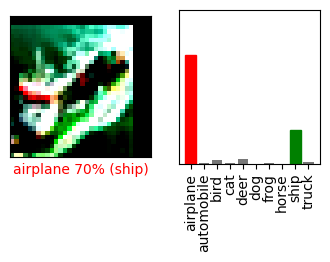

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

image_id = 15 # Pick an image id between 0 and 9999 inclusive

# Get a batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

img = images[image_id].to(device)
true_label = labels[image_id].to(device)

# Make a prediction
with torch.no_grad(): # Inference mode
    logits = model(img.unsqueeze(0))

ps = torch.nn.functional.softmax(logits, dim=1).cpu()
predictions = ps.numpy()[0]
predicted_label = np.argmax(predictions)

def plot_image(predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    img_display = np.clip(img.cpu().numpy().transpose((1, 2, 0)), 0, 1)

    plt.imshow(img_display)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plot_image(predictions, true_label.item(), img)
plt.subplot(1,2,2)
plot_value_array(predictions, true_label.item())
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

S.D.G.